In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
spotify = pd.read_csv('../Data/spotify_encoded.csv', index_col='track_id')
spotify.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
track_id,,,,,,,,,,,,,,,,,,,,,
5SuOikwiRyPMVoIQDJUgSV,73,-0.004759,-0.309921,0.648283,-0.678397,-1.205833,0.350223,-1.306583,0.448128,-0.868312,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4qPNDBW1i3p13qLCt0Ki3A,55,-0.692843,-0.309921,-0.781882,-1.818618,-1.205833,-1.616854,0.765355,-0.117369,1.756407,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1iJBSr7s7jYXzM8EGcbK5b,57,-0.173180,-0.309921,-0.681324,-1.072643,-1.486792,-0.210138,0.765355,-0.292021,-0.345016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6lfxq3CG4xtTiEg7opyCyx,71,-0.248673,-0.309921,-1.642216,-2.229870,-1.486792,-1.856901,0.765355,-0.456498,1.700487,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5vjLSffimiIP26QG5WcN2K,82,-0.274819,-0.309921,0.324261,-0.747970,-0.924873,-0.200198,0.765355,-0.318303,0.417265,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
X = spotify.drop(['popularity'], axis=1)
y = spotify['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [4]:
param_grid = {'n_neighbors': np.arange(10, 20)}
knn = KNeighborsRegressor()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])},
             scoring='r2')

In [5]:
print("Best Parameters:")
grid_search.best_params_

Best Parameters:


{'n_neighbors': 14}

In [6]:
best_knn = grid_search.best_estimator_

y_pred_train_best = best_knn.predict(X_train)
y_pred_test_best = best_knn.predict(X_test)

mse_train_best = mean_squared_error(y_train, y_pred_train_best)
rmse_train_best = np.sqrt(mse_train_best)
mae_train_best = mean_absolute_error(y_train, y_pred_train_best)
r2_train_best = r2_score(y_train, y_pred_train_best)

mse_test_best = mean_squared_error(y_test, y_pred_test_best)
rmse_test_best = np.sqrt(mse_test_best)
mae_test_best = mean_absolute_error(y_test, y_pred_test_best)
r2_test_best = r2_score(y_test, y_pred_test_best)

print('Training Set Metrics:')
print(f'MSE: {mse_train_best:.4f}')
print(f'RMSE: {rmse_train_best:.4f}')
print(f'MAE: {mae_train_best:.4f}')
print(f'R2: {r2_train_best:.4f}')
print()

print('Testing Set Metrics:')
print(f'MSE: {mse_test_best:.4f}')
print(f'RMSE: {rmse_test_best:.4f}')
print(f'MAE: {mae_test_best:.4f}')
print(f'R2: {r2_test_best:.4f}')

Training Set Metrics:
MSE: 238.7320
RMSE: 15.4510
MAE: 11.4657
R2: 0.3694

Testing Set Metrics:
MSE: 282.2117
RMSE: 16.7992
MAE: 12.5013
R2: 0.2630


Text(0.5, 0, 'Actual Popularity')

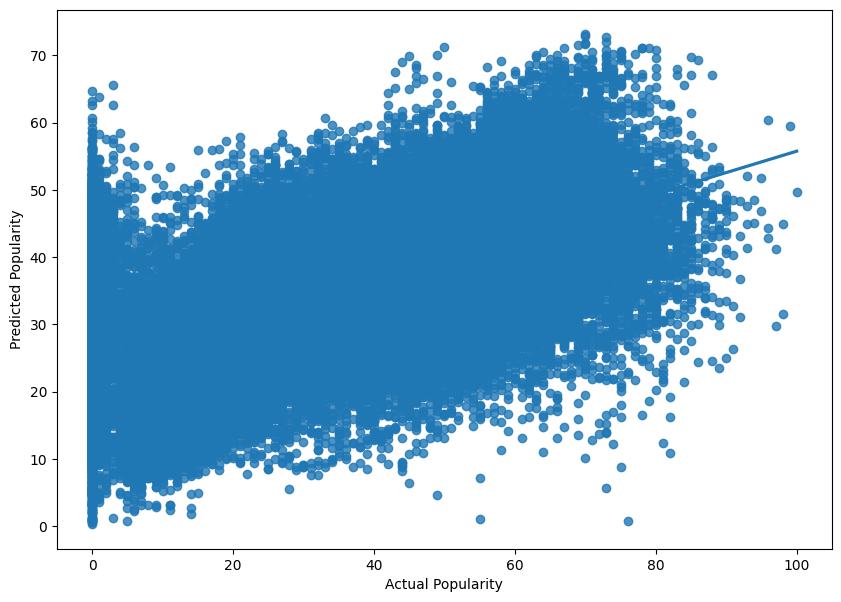

In [7]:
spotify['predicted_popularity'] = best_knn.predict(X)

plt.figure(figsize=(10,7))
ax = sns.regplot(x="popularity", y="predicted_popularity", data=spotify)
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_ylabel('Predicted Popularity')
ax.set_xlabel('Actual Popularity')